In [1]:
import numpy as np
import pandas as pd

**Load The DataSet**

In [2]:
df=pd.read_csv("/content/tips.csv")

In [3]:
dfcopy=df.copy()

In [4]:
dfcopy

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
dfcopy.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
#check null values
dfcopy.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
#check duplicate values
dfcopy.duplicated().sum()

1

In [9]:
#drop duplicates
dfcopy=dfcopy.drop_duplicates()

In [10]:
dfcopy.duplicated().sum()

0

In [11]:
dfcopy.shape

(243, 7)

In [12]:
dfcopy.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

**scatterplot**

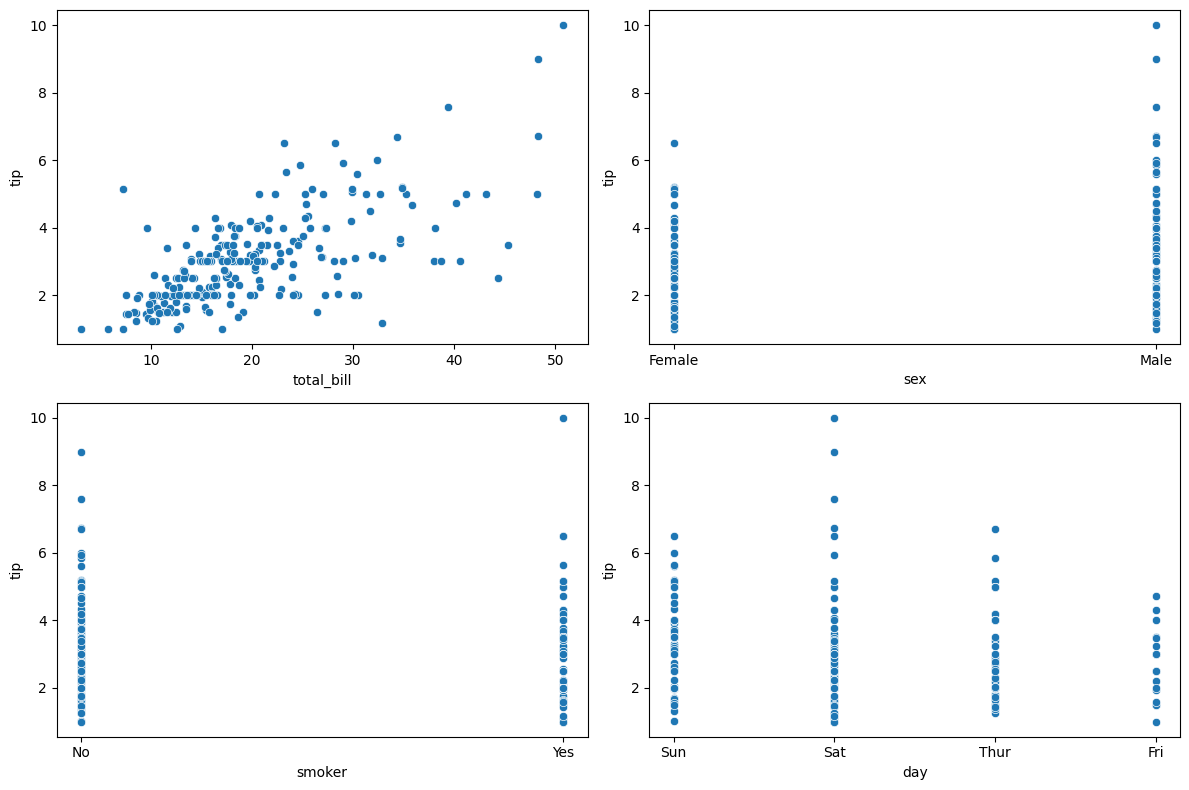

In [14]:
fig,axs=plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(x='total_bill', y='tip', data=dfcopy, ax=axs[0, 0])
sns.scatterplot(x='sex', y='tip', data=dfcopy, ax=axs[0, 1])
sns.scatterplot(x='smoker', y='tip', data=dfcopy, ax=axs[1, 0])
sns.scatterplot(x='day', y='tip', data=dfcopy, ax=axs[1, 1])
plt.tight_layout()
plt.show()

**Pairplot**

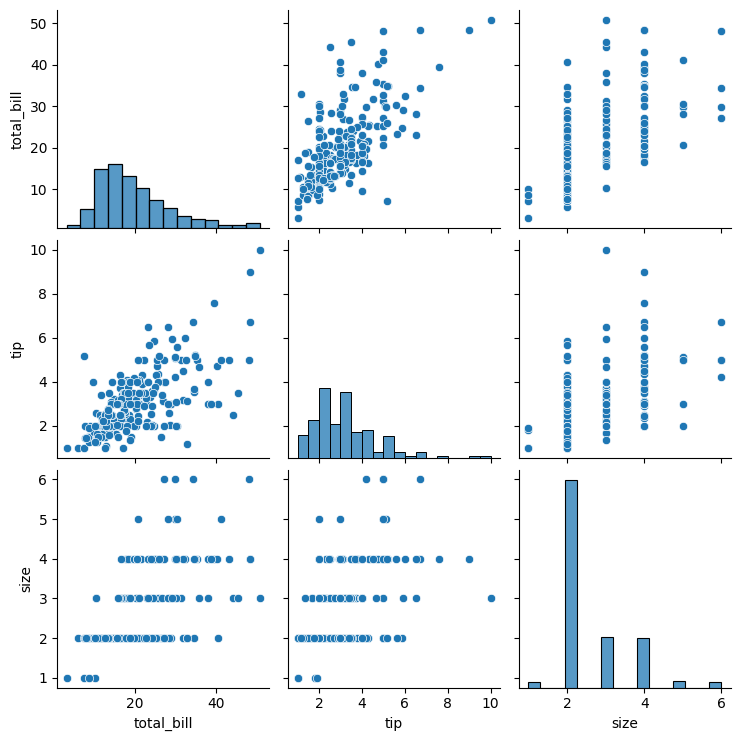

In [15]:
sns.pairplot(dfcopy)

**Feature Encoding**

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
categorical_columns=['sex', 'smoker', 'day', 'time']

In [19]:
for col in categorical_columns:
    dfcopy[col]=le.fit_transform(dfcopy[col])

<ipython-input-19-4b15abed0bb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy[col]=le.fit_transform(dfcopy[col])
<ipython-input-19-4b15abed0bb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy[col]=le.fit_transform(dfcopy[col])
<ipython-input-19-4b15abed0bb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [20]:
dfcopy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


**Simple Linear Regression**

**Train Test Split** (one independent column)

In [21]:
x=dfcopy[['total_bill']]
y=dfcopy['tip']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
le=LinearRegression()

In [25]:
le.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=le.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [28]:
print("r2_score",r2_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))

r2_score 0.5276979930058592
mean_squared_error 1.1507520570798673
mean_absolute_error 0.7565505996715425


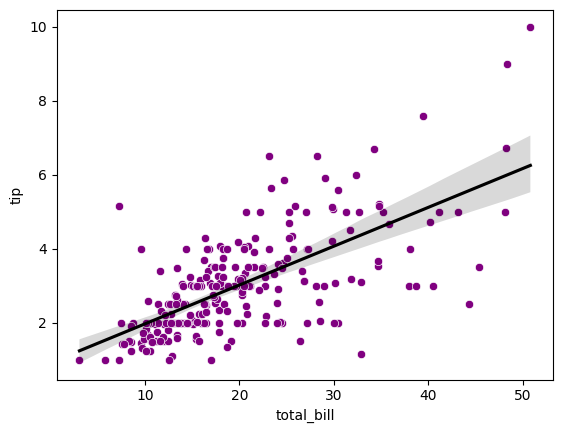

In [29]:
sns.scatterplot(x='total_bill', y='tip', data=dfcopy,color="purple")
sns.regplot(x='total_bill', y='tip', data=dfcopy, scatter=False, color='black')
plt.show()

In [30]:
comparison=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

     Actual  Predicted
24     3.18   3.013226
6      2.00   1.910536
152    2.74   2.757761
233    1.47   2.110118
239    5.92   3.932301
175    3.11   4.318492
216    3.00   3.844485
150    2.50   2.439428
9      3.23   2.510280
113    2.55   3.425363
45     3.00   2.860546
210    2.00   4.035085
228    2.72   2.360593
170   10.00   6.105748
82     1.83   2.040264
161    2.50   2.298723
237    1.17   4.311506
15     3.92   3.188858
66     2.47   2.676931
127    2.00   2.484334
33     2.45   3.100044
19     3.35   3.096053
108    3.76   2.855556
30     1.45   1.988373
185    5.00   3.100044
164    3.00   2.782709
10     1.71   2.060222
73     5.00   3.558085
93     4.30   2.663958
155    5.14   4.014129
111    1.00   1.758854
218    1.44   1.807751
25     2.34   2.812646
60     3.21   3.060128
18     3.50   2.728822
126    1.48   1.885588
96     4.00   3.757667
196    2.00   2.067208
137    2.00   2.447411
241    2.00   3.297630
75     1.25   2.084172
117    1.50   2.098143
112    4.00

**Multiple Linear Regression**

**Train Test Split** (Multiple independent column)

In [31]:
x=dfcopy[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y=dfcopy['tip']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
le=LinearRegression()

In [35]:
le.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred2=le.predict(x_test)

In [37]:
print("r2_score",r2_score(y_test,y_pred2))
print("mean_squared_error",mean_squared_error(y_test,y_pred2))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred2))

r2_score 0.5198425346286453
mean_squared_error 1.1698916854384571
mean_absolute_error 0.7685823335429992


In [38]:
comparison=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
print(comparison)

     Actual  Predicted
24     3.18   2.898980
6      2.00   1.983016
152    2.74   2.921545
233    1.47   2.130117
239    5.92   3.898678
175    3.11   3.981466
216    3.00   4.206831
150    2.50   2.433289
9      3.23   2.493609
113    2.55   3.272667
45     3.00   2.791809
210    2.00   3.934616
228    2.72   2.343360
170   10.00   5.697478
82     1.83   1.873530
161    2.50   2.313500
237    1.17   3.952705
15     3.92   3.071318
66     2.47   2.587112
127    2.00   2.468832
33     2.45   3.381814
19     3.35   3.186736
108    3.76   2.764748
30     1.45   2.026469
185    5.00   3.647431
164    3.00   2.648412
10     1.71   2.110452
73     5.00   3.285716
93     4.30   2.501686
155    5.14   4.400077
111    1.00   1.588264
218    1.44   1.821129
25     2.34   3.162699
60     3.21   2.887342
18     3.50   2.871344
126    1.48   1.984651
96     4.00   3.458380
196    2.00   2.087705
137    2.00   2.437397
241    2.00   3.089540
75     1.25   2.108028
117    1.50   2.140047
112    4.00

**Polynomial Features**

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly=PolynomialFeatures(degree=2)

**Train Test Split**

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
x_train_poly=poly.fit_transform(x_train)

In [43]:
x_train_poly.shape

(194, 28)

In [44]:
x_test_poly=poly.transform(x_test)

In [45]:
x_test_poly.shape

(49, 28)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
le=LinearRegression()

In [48]:
le.fit(x_train_poly,y_train)

LinearRegression()

In [49]:
y_pred3=le.predict(x_test_poly)

In [50]:
print("r2_score",r2_score(y_test,y_pred3))
print("mean_squared_error",mean_squared_error(y_test,y_pred3))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred3))

r2_score 0.15339444499211508
mean_squared_error 2.0627333137135113
mean_absolute_error 1.0576200773278062
